1. Load the first N = 5000 MNIST digits. Select only those digits in the training set which are either zeros or ones
2. Take the first N/2 digits to be training set, 
3. and the remaining N/2 to be the test set. 
4. Apply your implementation of the perceptron algorithm to this data. (Remember that the corresponding class vector has to be converted to ±1.) 
5. Does the algorithm converge? After how many iterations? 
6. Applying the learned linear classifier to the test set (using only those instances which are zeros or ones), what is the error rate? 
7. Plot the pixel weights as an image (leaving out the bias weight), does it resemble a zero or a one? Why or why not?

In [1]:
import numpy as np
from mnist import MNIST

mndata = MNIST('data')


# 1, 2, 3
images, labels = mndata.load_training()
images = np.array(images)[:5000]
labels = np.array(labels)[:5000]
mask = (labels == 0) + (labels == 1)
images = images[mask]
labels = labels[mask]
ls = []
for l in labels:
    if l == 0:
        ls.append(-1)
    else:
        ls.append(l)
labels = np.array(ls)
split_idx = int(len(labels)/2)
X_train, y_train = images[:split_idx], labels[:split_idx]
X_test, y_test = images[split_idx:], labels[split_idx:]

label: -1


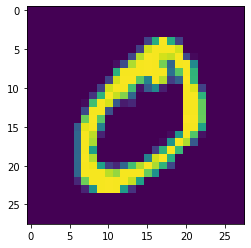

In [53]:
import matplotlib.pyplot as plt

imgidx = 0
print(f"label: {y_train[imgidx]}")
plt.imshow(X_train[imgidx].reshape(28, 28))

In [3]:
import perceptron

# 4, 5
coefs = perceptron.fit(X_train, y_train, max_epochs=50)

All correct! Epoch 5


In [24]:
preds = perceptron.predict(coefs, X_test)

In [28]:
def convert_labels(y, threshold=0):
    """
    Converts labels from real value domain to binary classes [-1, 1] based on threshold.
    """
    y_new = [1 if e >= 0 else -1 for e in y]
    return np.array(y_new)


def accuracy(y_true, y_pred):
    true_mask = (y_true == y_pred)
    return true_mask.sum() / true_mask.shape[0]


# 6
conv_preds = convert_labels(preds)
print(accuracy(y_test, conv_preds))

1.0


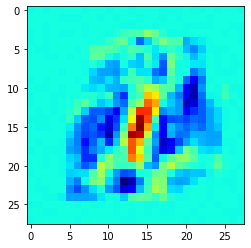

In [33]:
# 7
plt.imshow(coefs.reshape(28, 28), cmap='jet')

In [45]:
for i in range(392, 420):
    print(coefs[i])

0.3685637257994935
0.008820261959898157
0.24642588283835454
0.9564177361115116
0.20094646169326513
108.27646194870825
-128.13780182164328
-435.33758878451624
-492.78797443047756
-325.53753477448265
-805.418782942576
-562.1044090057316
-68.90279596028131
768.3343514835302
1712.3829576765486
1296.9426425622698
182.7279844367986
-667.3574500547427
-495.83495225014315
-459.5168206948502
-529.9706896721743
-415.7246014250303
-448.9618748255588
-252.25602422108477
-111.94280891263344
0.3173335426486299
0.7532137263046057
0.3395417091173507
